<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Air_Quality_Index_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

**Loading Dataset**

In [2]:
air_df=pd.read_csv('/content/drive/MyDrive/city_day.csv')

**understanding Dataset**

In [3]:
air_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
air_df.shape

(29531, 16)

In [5]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
air_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
air_df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [8]:
air_df.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


**Data Preprocessing**

In [9]:
air_df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


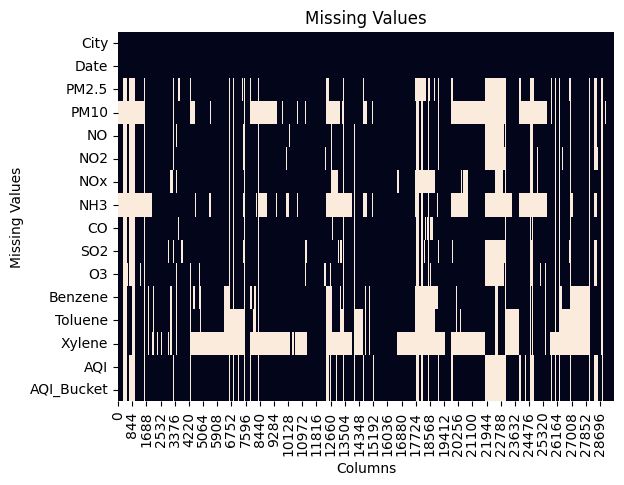

In [10]:
ax = plt.axes()
sns.heatmap(air_df.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

*you can see a huge number of null values in almost every column*

In [11]:
#Label Encoding
air_df['City']=le.fit_transform(air_df['City'])

In [12]:
air_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,0,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,0,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,0,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,0,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [13]:
#This is to clarify that which city is classified as which integer after label encoding
city_mapping = {i: city for i, city in enumerate(le.classes_)}
print(city_mapping)


{0: 'Ahmedabad', 1: 'Aizawl', 2: 'Amaravati', 3: 'Amritsar', 4: 'Bengaluru', 5: 'Bhopal', 6: 'Brajrajnagar', 7: 'Chandigarh', 8: 'Chennai', 9: 'Coimbatore', 10: 'Delhi', 11: 'Ernakulam', 12: 'Gurugram', 13: 'Guwahati', 14: 'Hyderabad', 15: 'Jaipur', 16: 'Jorapokhar', 17: 'Kochi', 18: 'Kolkata', 19: 'Lucknow', 20: 'Mumbai', 21: 'Patna', 22: 'Shillong', 23: 'Talcher', 24: 'Thiruvananthapuram', 25: 'Visakhapatnam'}


In [14]:
air_df.drop(['Date'],axis=1,inplace=True)

In [15]:
for col in air_df.columns:
    air_df[col] = pd.to_numeric(air_df[col], errors='coerce')

air_df.fillna(air_df.mean(), inplace=True)

In [16]:
air_df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [18]:
air_df.drop(['AQI_Bucket'],axis=1,inplace=True)

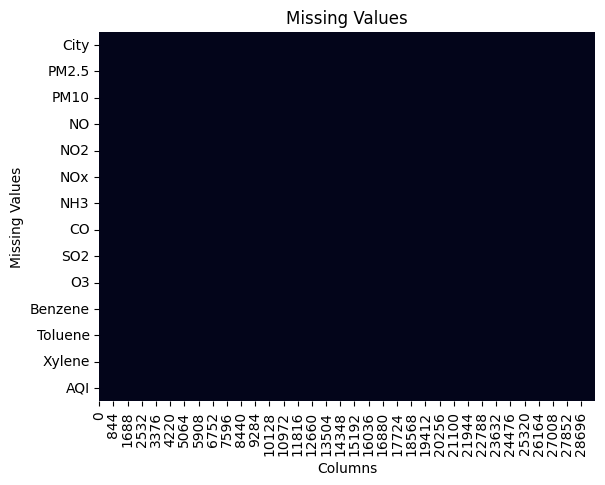

In [19]:
ax = plt.axes()
sns.heatmap(air_df.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

In [20]:
air_df.duplicated().sum()

2297

In [21]:
air_df.drop_duplicates(inplace=True)

In [22]:
air_df.shape

(27234, 14)

**Data Visualization**

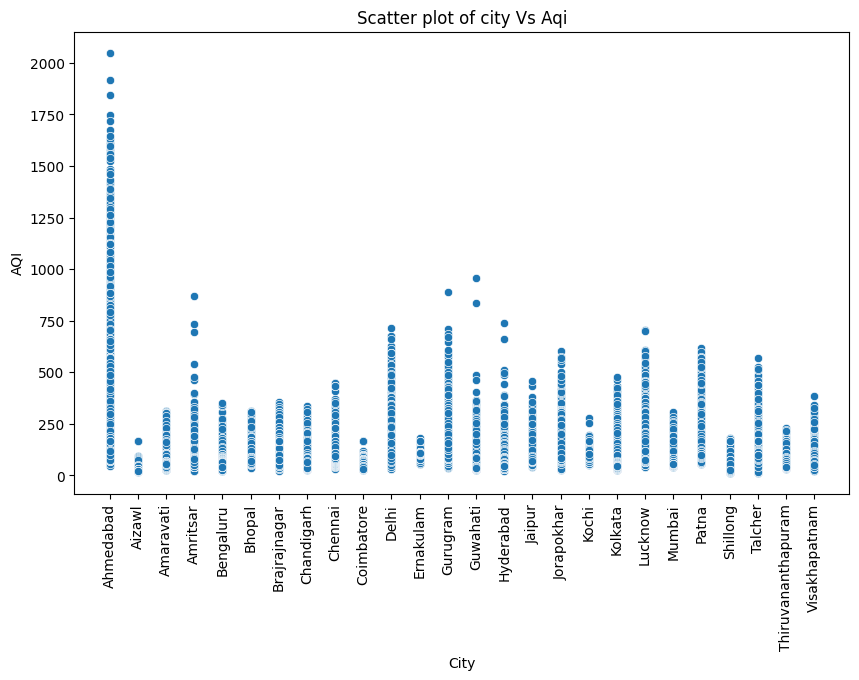

In [23]:
#Scatter plot of city Vs Aqi
plt.figure(figsize=(10,6))
sns.scatterplot(x='City',y='AQI',data=air_df)
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('Scatter plot of city Vs Aqi')

plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=90)
plt.show()


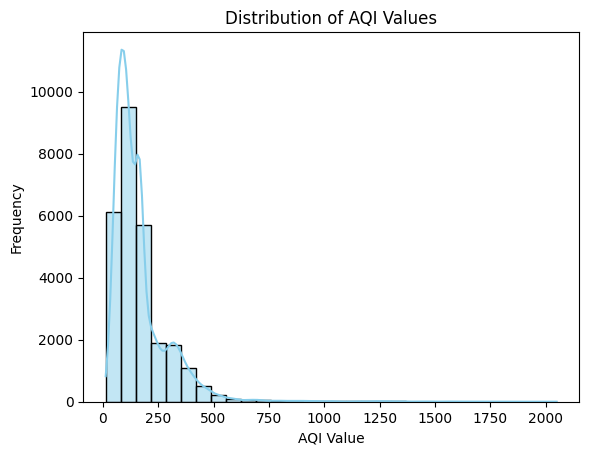

In [24]:
sns.histplot(air_df['AQI'], bins=30, color='skyblue', edgecolor='black',kde=True)
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.show()


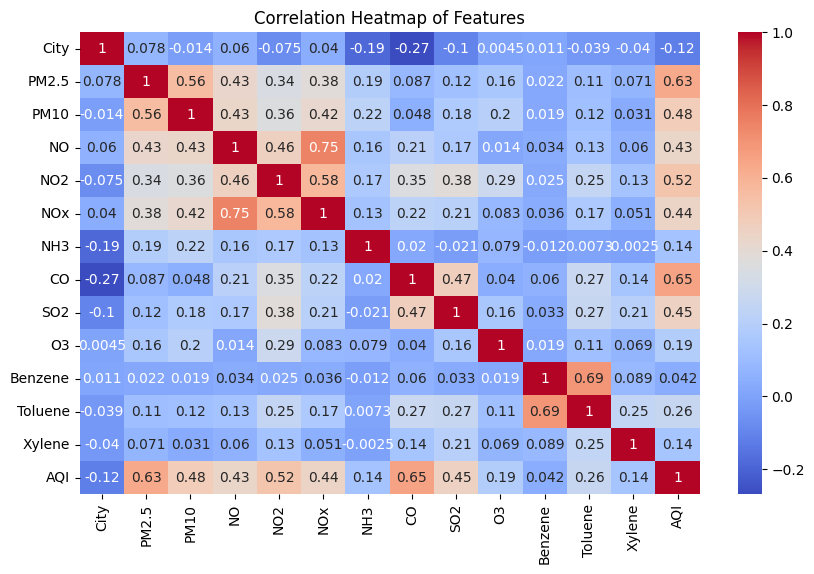

In [25]:
plt.figure(figsize=(10, 6))
corr_matrix = air_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


**Model Building**

*Standard Scaling*

In [26]:
air_df_scaled=scaler.fit_transform(air_df)

In [27]:
air_df_scaled=pd.DataFrame(air_df_scaled,columns=air_df.columns)

In [28]:
air_df_scaled.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,-1.736389,-0.000041,-0.000041,-0.748887,-0.433076,-0.507810,-0.000317,-0.199679,0.744430,4.708899,-0.227794,-0.504784,-0.775770,2.114793e-16
1,-1.736389,-0.000041,-0.000041,-0.746639,-0.538995,-0.530517,-0.000317,-0.192518,0.568935,-0.020575,0.020795,-0.194779,0.152077,2.114793e-16
2,-1.736389,-0.000041,-0.000041,-0.007911,-0.387862,-0.094800,-0.000317,2.160590,0.825647,-0.180606,0.231556,0.421836,-0.222015,2.114793e-16
3,-1.736389,-0.000041,-0.000041,-0.713817,-0.422191,-0.480824,-0.000317,-0.087967,0.230438,0.075634,0.071459,0.067706,-0.529656,2.114793e-16
4,-1.736389,-0.000041,-0.000041,0.203412,-0.299108,0.170447,-0.000317,2.833725,1.408360,0.229473,0.245742,0.562695,-0.091575,2.114793e-16


In [29]:
#Independent and dependent features
X=air_df_scaled.drop('AQI',axis=1)
y=air_df_scaled['AQI']

*Train Test Split*

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
#Initialising the model
gbr=GradientBoostingRegressor(n_estimators=200)

In [32]:
#Fit the data to model
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=200)

In [33]:
#predict
y_pred=gbr.predict(X_test)

**Evaluation of Model**

In [34]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Mean Squared Error: 0.12195391630527688
R2 Score: 0.8631256350481741
Mean Absolute Error: 0.18205054969962117


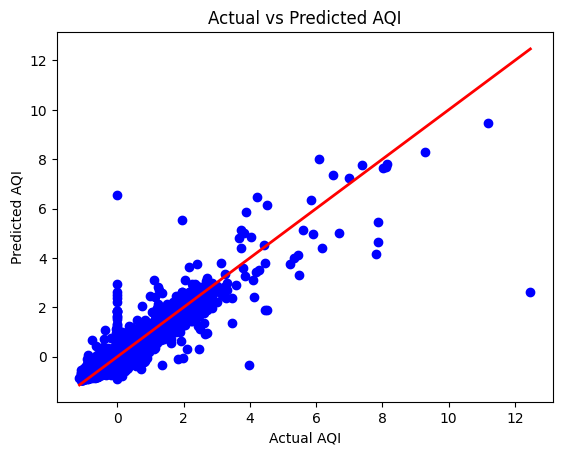

In [35]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


🌬️ Air Quality Classification 🌬️
*   🌿 Good: 0 - 50
*   🌼 Moderate: 51 - 100
*   🟡 Unhealthy for Sensitive Groups: 101 - 150
*   🔴 Unhealthy: 151 - 200
*   🟠 Very Unhealthy: 201 - 300
*   ⚠️ Hazardous: 301 - 500


